# Color Identification using Machine Learning

In this notebook, I have used machine learning algorithm, `KMeans`, to extract colors from a give image. I will use `OpenCV2` for image manipulation, apply `KMeans` to identify the major colors and then plot the information using `Matplotlib`.

## Import libraries

Let's first import necessary libraries. We need `sklearn` for KMeans algorithm, `matplotlib.pyplot` for plotting graphs, `numpy` to work with arrays, `cv2` to work with image data, `collections` to use Counter to count values, `rgb2lab` to convert RGB values and `deltaE_cie76` to calculate similarity between colors.

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

## Working with OpenCV

Let's first read a sample image and understand basic operations that we can do on it.

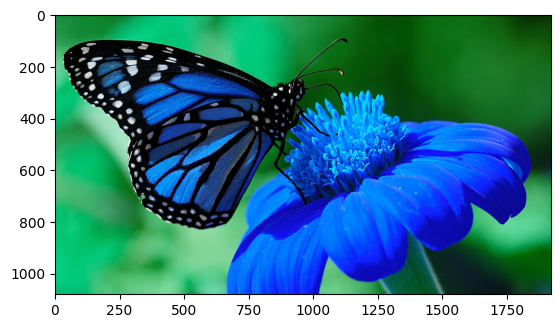

In [5]:
image = cv2.imread('/content/Image 24.jpg')
plt.imshow(image)

In [6]:
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))

The type of this input is <class 'numpy.ndarray'>
Shape: (1080, 1920, 3)


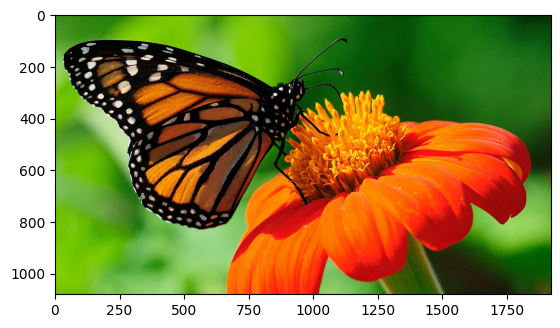

In [7]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

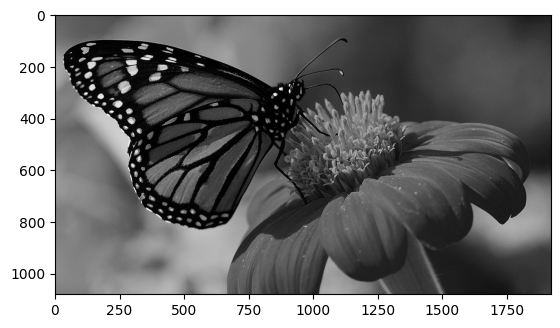

In [8]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

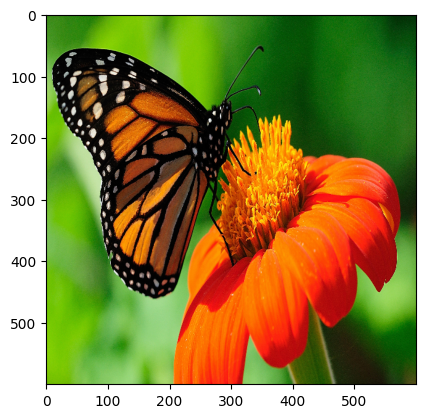

In [10]:
resized_image = cv2.resize(image, (600, 600))
plt.imshow(resized_image)

##***Color Identification***
##***RGB to Hex Conversion***
We’d first define a function that will convert RGB to hex so that we can use them as labels for our pie chart.

In [72]:
def RGB2HEX(color):
  return "##{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

##***Read image in RGB color space***
Next, we define a method that will help us get an image into Python in the RGB space.

In [76]:
def get_image(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

##***Get colors from an image***
We now define the complete code as a method that we can call to extract the top colors from the image and display them as a pie chart. I’ve named the method as get_colors and it takes 3 arguments:

image: The image whose colors we wish to extract.
number_of_colors: Total colors we want to extract.
show_chart: A boolean that decides whether we show the pie chart or not.

In [95]:
def get_colors(image_path, number_of_colors, show_chart=True):
    image = get_image(image_path)
    modified_image = cv2.resize(image, (600, 400), interpolation=cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0] * modified_image.shape[1], 3)

    clf = KMeans(n_clusters=number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]

    if show_chart:
        plt.figure(figsize=(8, 6))
        plt.pie(counts.values(), labels=hex_colors, colors=[c / 255 for c in ordered_colors])
        plt.show()

    return hex_colors

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


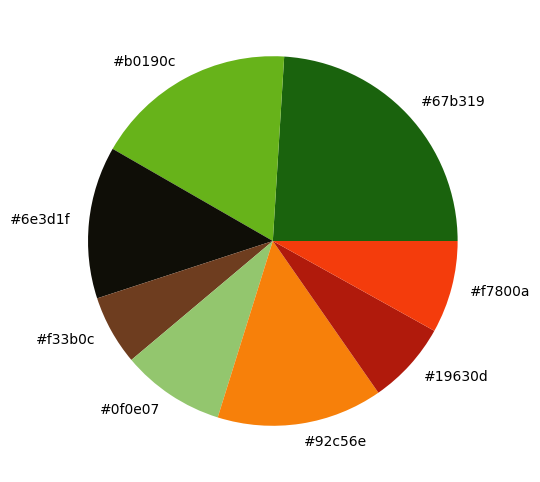

['#67b319', '#b0190c', '#6e3d1f', '#f33b0c', '#0f0e07', '#92c56e', '#19630d', '#f7800a']


In [97]:
# Usage example:
hex_colors = get_colors('/content/sample_data/Untitled Folder/images/Image 24.jpg', 8, True)
print(hex_colors)

##***Search Images using color***
We’ll now dive into the code of filtering a set of five images based on the color we’d like. For our use case, we’ll supply the RGB values for the colors Green, Blue and Yellow and let our system filter the images

In [98]:
IMAGE_DIRECTORY ='/content/sample_data/Untitled Folder/images'
COLORS ={'GREEN' : [0,128,0], 'BLUE' :[0,0,128], 'YELLOW':[255,255,0]}
images=[]
for file in os.listdir(IMAGE_DIRECTORY):
  if not file.startswith('.'):
    images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

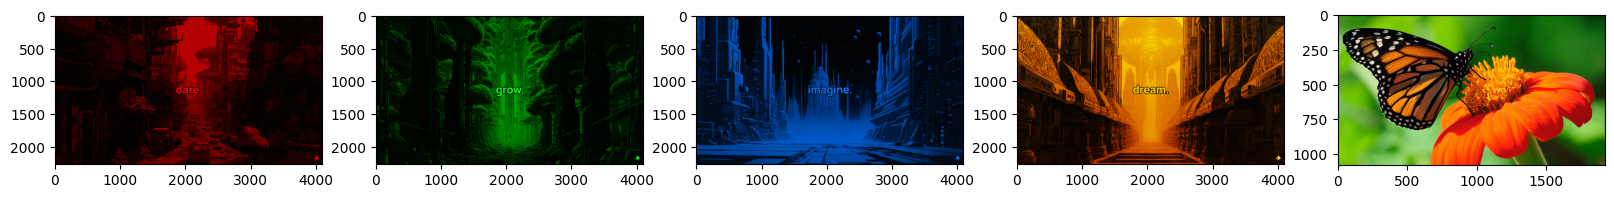

In [99]:
plt.figure(figsize=(20,10))
for i in range(len(images)):
  plt.subplot(1,len(images), i+1)
  plt.imshow(images[i])

In [50]:
def match_image_by_color(image, color, threshold =60, number_of_colors = 10):
  image_colors = get_colors(image, number_of_colors, False)
  selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
  select_image = False
  for i in range(number_of_colors):
    curr_color = rgb2lab(np.uint8(np.array([image_colors[i]])))
    diff = deltaE_cie76(selected_color, curr_color)
    if (diff<threshold):
      select_image =True
  return select_image

##***Show selected images***
We define a function show_selected_images that iterates over all images, calls the above function to filter them based on color and displays them on the screen using imshow.

In [51]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1

    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

##***Filter Results***
We call the method as follows. We will just replace the variable selected_color with COLORS['GREEN'] for Green, COLORS['BLUE'] for Blue, and COLORS['YELLOW'] for Yellow. We set the threshold value to be 60 and total colors to be extracted from image to be 5.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

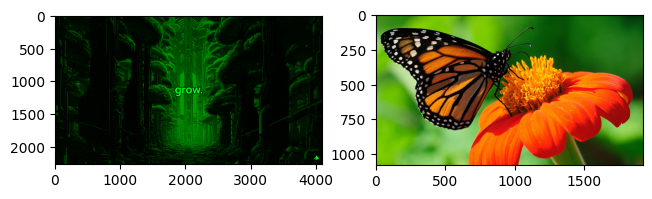

In [53]:
# Variable 'selected_color' can be any of COLORS['GREEN'], COLORS['BLUE'] or COLORS['YELLOW']
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

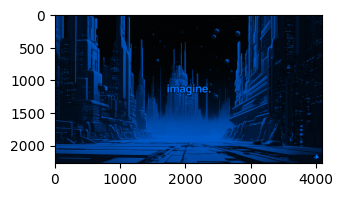

In [54]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

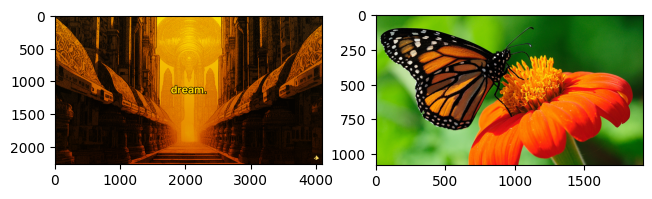

In [55]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

###***Conclusion***
In this notebook, we used KMeans to extract majority colors from images. We then used the RGB Values of Colors to identify images from a collection that have that color in them.